## **Data Storytelling - What A Waste Global Database**

What A Waste Global Database is a project done by World Bank to document solid waste management across countries in the world. The data is first published in 2018 and the original data source could be found at this link - https://datacatalog.worldbank.org/dataset/what-waste-global-database 

In [459]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import folium
import json

In [460]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [461]:
path = '/content/drive/MyDrive/Colab Notebooks/Springboard - Data Science Career Track/20. Data Storytelling/country level data.csv'
df = pd.read_csv(path)
df.head(5)

,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,other_information_information_system_for_solid_waste_management,other_information_national_agency_to_enforce_solid_waste_laws_and_regulations,other_information_national_law_governing_solid_waste_management_in_the_country,other_information_ppp_rules_and_regulations,other_information_summary_of_key_solid_waste_information_made_available_to_the_public,population_population_number_of_people,special_waste_agricultural_waste_tons_year,special_waste_construction_and_demolition_waste_tons_year,special_waste_e_waste_tons_year,special_waste_hazardous_waste_tons_year,special_waste_industrial_waste_tons_year,special_waste_medical_waste_tons_year,total_msw_total_msw_generated_tons_year,waste_collection_coverage_rural_percent_of_geographic_area,waste_collection_coverage_rural_percent_of_households,waste_collection_coverage_rural_percent_of_population,waste_collection_coverage_rural_percent_of_waste,waste_collection_coverage_total_percent_of_geographic_area,waste_collection_coverage_total_percent_of_households,waste_collection_coverage_total_percent_of_population,waste_collection_coverage_total_percent_of_waste,waste_collection_coverage_urban_percent_of_geographic_area,waste_collection_coverage_urban_percent_of_households,waste_collection_coverage_urban_percent_of_population,waste_collection_coverage_urban_percent_of_waste,waste_treatment_anaerobic_digestion_percent,waste_treatment_compost_percent,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured
0,ABW,LCN,Aruba,HIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,Yes,103187.0,NaN,NaN,NaN,NaN,NaN,NaN,8.813202e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,89.0,NaN,NaN
1,AFG,SAS,Afghanistan,LIC,2.141361e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,NaN,34656032.0,6802511.0,NaN,20000.0,NaN,NaN,9855.00,5.628525e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
2,AGO,SSF,Angola,LMC,1.030423e+11,51.8,6.7,4.4,11.50,11.9,13.5,NaN,NaN,NaN,NaN,NaN,Yes,Yes,NaN,25096150.0,NaN,NaN,92000.0,NaN,NaN,5495.95,4.213644e+06,NaN,NaN,NaN,NaN,NaN,NaN,23.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALB,ECS,Albania,UMC,1.347108e+10,51.4,4.5,4.8,15.21,9.9,9.6,NaN,4.6,NaN,No,Yes,Yes,Yes,No,2880703.0,NaN,203009.0,20000.0,5714.82,270269.0,114.30,1.142964e+06,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Some disposal sites
4,AND,ECS,Andorra,HIC,3.319880e+09,31.2,8.2,2.6,11.60,35.1,11.3,NaN,NaN,NaN,NaN,Yes,Yes,Yes,NaN,82431.0,NaN,NaN,NaN,1788.00,NaN,NaN,4.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.1,NaN,NaN,NaN,NaN,NaN,47.9,NaN,NaN


**1) Global Picture of Waste Production**

In [462]:
# how many tons of waste is the world producing in a year
ttl_waste = (df['total_msw_total_msw_generated_tons_year'].sum()//1000000).astype(int)
ttl_waste = ttl_waste.astype(str) + ' mil tons'

In [463]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

Text(-0.15, 0.25, 'of waste were produced per annum')

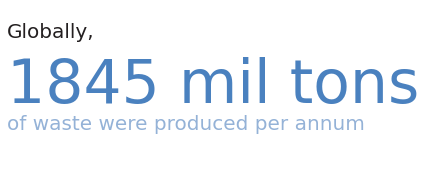

In [464]:
# create the chart base
plt.figure(figsize=(6, 3))
plt.axis('off')

# adding text to the chart
plt.text(-0.15, 0.81,'Globally,', fontsize=20, color='#231F20')
plt.text(-0.15, 0.41, ttl_waste, fontsize=60, color='#4A81BF')
plt.text(-0.15, 0.25, 'of waste were produced per annum', fontsize=20, color='#94B2D7')

In [465]:
# average waste produced per capita
df['avg_waste_per_capita'] = df['total_msw_total_msw_generated_tons_year']/df['population_population_number_of_people']
wastepercapita = "{:.2f}".format(df['avg_waste_per_capita'].mean()) + ' tons'

Text(-0.15, 0.25, 'of waste were produced per person per annum')

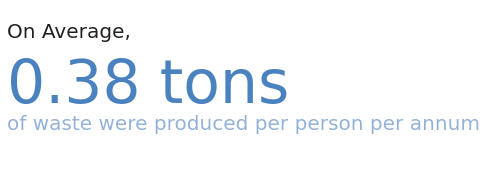

In [466]:
# create the chart base
plt.figure(figsize=(6, 3))
plt.axis('off')

# adding text to the chart
plt.text(-0.15, 0.81,'On Average,', fontsize=20, color='#231F20')
plt.text(-0.15, 0.41, wastepercapita, fontsize=60, color='#4A81BF')
plt.text(-0.15, 0.25, 'of waste were produced per person per annum', fontsize=20, color='#94B2D7')

Text(0.5, 1.0, 'Top 10 Waste Producing Countries')

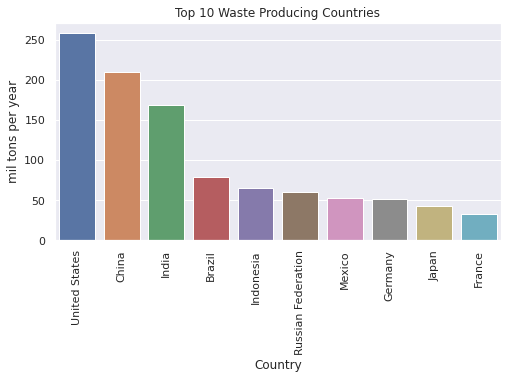

In [467]:
# countries producing the most waste per capita
df['mil tons per year'] = df['total_msw_total_msw_generated_tons_year']//1000000
top_10_waste = df[['country_name', 'mil tons per year']].sort_values(by='mil tons per year', ascending=False).head(10)
sns.barplot(x='country_name', y='mil tons per year', data=top_10_waste)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.title('Top 10 Waste Producing Countries')

In [468]:
# countries producing the most waste
top_10_waste_pc = df[['country_name', 'avg_waste_per_capita']].sort_values(by='avg_waste_per_capita', ascending=False).head(10)
top_10_waste_pc

,country_name,avg_waste_per_capita
93,Iceland,1.586990
208,Virgin Islands (U.S.),1.384898
169,Singapore,1.373981
24,Bermuda,1.265471
65,Faeroe Islands,1.248925
121,Monaco,1.217479
157,Puerto Rico,1.200903
122,Moldova,1.120169
34,Channel Islands,1.087468
207,British Virgin Islands,1.022000


In [469]:
#world map
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

In [470]:
#a few clean ups
df.replace('United States', 'United States of America', inplace = True)
df.replace('Russian Federation', 'Russia', inplace = True)
df.replace('Egypt, Arab Rep.', 'Egypt', inplace = True)
df.replace('Iran, Islamic Rep.', 'Iran', inplace = True)
df.replace('Congo, Dem. Rep.', 'Democratic Republic of the Congo', inplace = True)
df.replace('Venezuela, RB', 'Venezuela', inplace = True)
df.replace('Tanzania', 'United Republic of Tanzania', inplace = True)

In [471]:
map = folium.Map(location=[39.38, 8.22], zoom_start=1)
folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=country_shapes,
    name='The World Map of Solid Waste',
    data=df,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['country_name', 'mil tons per year'],
    key_on='feature.properties.name',
    fill_color='RdYlBu_r',
    nan_fill_color='grey'
    ).add_to(map)
map

Text(0.5, 1.0, 'Percentage of Countries which has Waste Mgt Laws')

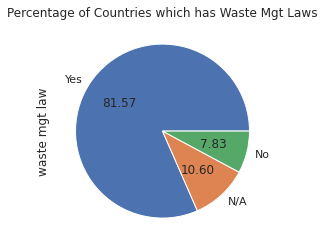

In [472]:
#how many countries has waste management laws
df.rename(columns={'other_information_national_law_governing_solid_waste_management_in_the_country': 'waste mgt law'}, inplace=True)
df['waste mgt law'].replace({np.nan: 'N/A', 'yes': 'Yes'}, inplace=True)
df['waste mgt law'].value_counts().plot(kind='pie', autopct='%.2f')
plt.title('Percentage of Countries which has Waste Mgt Laws')

Text(27.180115972222225, 0.5, 'GDP')

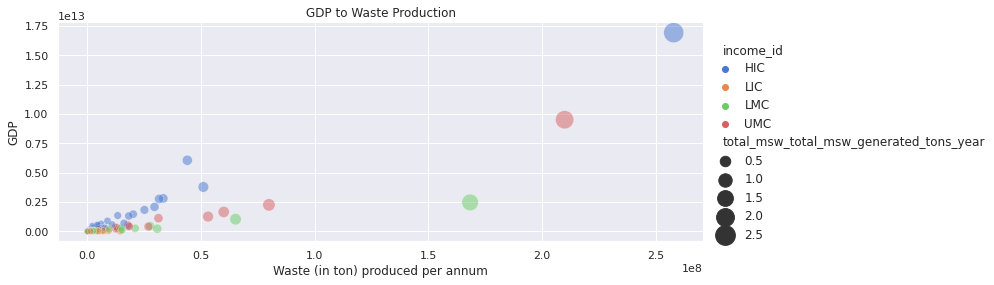

In [473]:
# relationship between gdp and waste production
sns.relplot(x="total_msw_total_msw_generated_tons_year", y="gdp", hue="income_id", size="total_msw_total_msw_generated_tons_year",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=4, aspect=2.5, data=df)
plt.title('GDP to Waste Production')
plt.xlabel('Waste (in ton) produced per annum')
plt.ylabel('GDP')

Text(23.827583854166676, 0.5, 'Population')

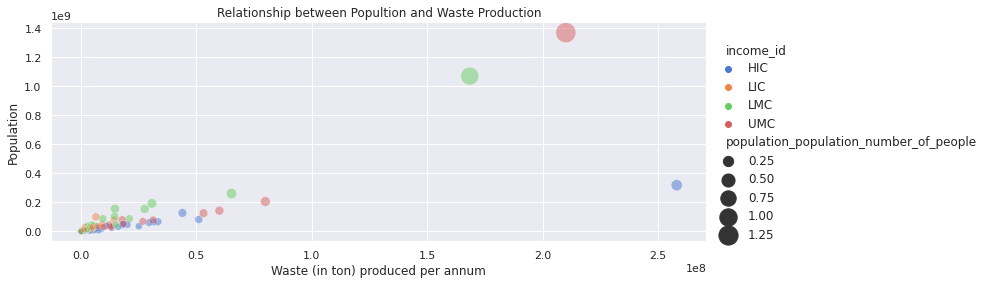

In [474]:
#relationship between population and waste production
sns.relplot(x="total_msw_total_msw_generated_tons_year", y="population_population_number_of_people", hue="income_id", size="population_population_number_of_people",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=4, aspect=2.5, data=df)
plt.title('Relationship between Popultion and Waste Production')
plt.xlabel('Waste (in ton) produced per annum')
plt.ylabel('Population')

**2) Waste Management & Recycling**

In [475]:
# countries with best waste collection coverage by income id
waste_coll = df.groupby(['income_id'])['waste_collection_coverage_total_percent_of_population'].mean().round(2).reset_index()
waste_coll['income_id'].replace({'HIC': 'High Income Countries', 'LIC': 'Low Income Countries', 'LMC': 'Lower Middle-Income Countries', 'UMC': 'Upper Middle-Income Countries'}, inplace=True)
waste_c = waste_coll.sort_values(by='waste_collection_coverage_total_percent_of_population', ascending=False)
waste_c

,income_id,waste_collection_coverage_total_percent_of_population
0,High Income Countries,94.56
3,Upper Middle-Income Countries,77.94
2,Lower Middle-Income Countries,50.93
1,Low Income Countries,30.16


Text(0.5, 1.0, 'Waste Collection Coverage (by country income group)')

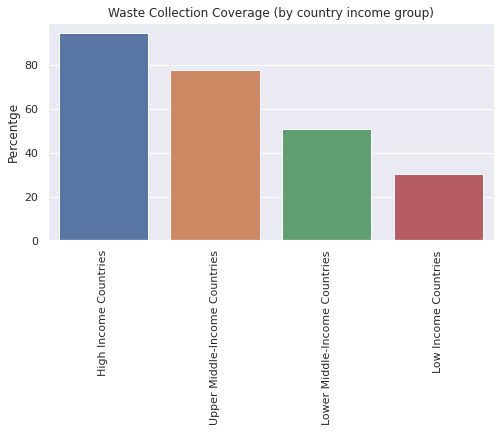

In [476]:
sns.barplot(x='income_id', y='waste_collection_coverage_total_percent_of_population', data=waste_c)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Percentge')
plt.title('Waste Collection Coverage (by country income group)')

In [477]:
#recycling efforts
recyclepct = "{:.2f}".format(df['waste_treatment_recycling_percent'].mean()) + ' %'

Text(-0.15, 0.25, 'of waste is being recycled')

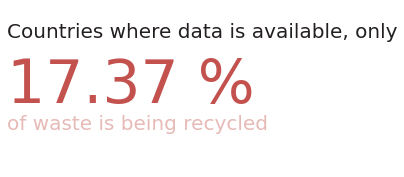

In [478]:
# create the chart base
plt.figure(figsize=(6, 3))
plt.axis('off')

# adding text to the chart
plt.text(-0.15, 0.81,'Countries where data is available, only', fontsize=20, color='#231F20')
plt.text(-0.15, 0.41, recyclepct, fontsize=60, color='#C3514E')
plt.text(-0.15, 0.25, 'of waste is being recycled', fontsize=20, color='#E6BAB7')

In [479]:
#countries leading recycling efforts
top_10_recycle = df[['country_name', 'waste_treatment_recycling_percent']].sort_values(by='waste_treatment_recycling_percent', ascending=False).head(10)
top_10_recycle

,country_name,waste_treatment_recycling_percent
65,Faeroe Islands,67.00
112,Liechtenstein,64.60
169,Singapore,61.00
105,"Korea, Rep.",58.00
93,Iceland,55.81
88,Isle of Man,50.00
50,Germany,47.83
180,Slovenia,46.44
173,San Marino,45.05
10,Australia,42.10


In [480]:
#recycling efforts in accordance to country income id
recycle_income_id = df.groupby(['income_id'])['waste_treatment_recycling_percent'].mean().round(2).reset_index()
recycle_income_id['income_id'].replace({'HIC': 'High Income Countries', 'LIC': 'Low Income Countries', 'LMC': 'Lower Middle-Income Countries', 'UMC': 'Upper Middle-Income Countries'}, inplace=True)
recycle = recycle_income_id.sort_values(by='waste_treatment_recycling_percent', ascending=False)
recycle

,income_id,waste_treatment_recycling_percent
0,High Income Countries,25.55
2,Lower Middle-Income Countries,10.68
3,Upper Middle-Income Countries,9.67
1,Low Income Countries,7.85


Text(0.5, 1.0, 'Proportion of Recycling (by country income group)')

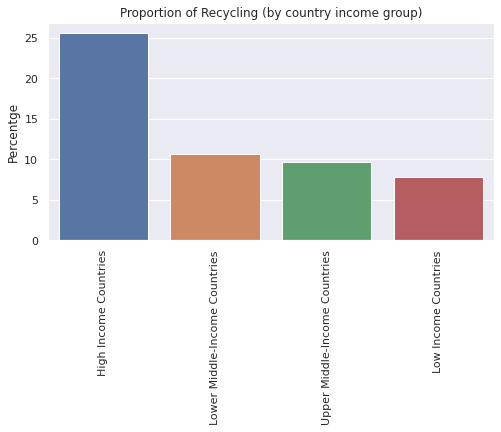

In [481]:
sns.barplot(x='income_id', y='waste_treatment_recycling_percent', data=recycle)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Percentge')
plt.title('Proportion of Recycling (by country income group)')

In [482]:
# countries still having a high portion of open dump, which is environmentally harmful
df[['country_name', 'waste_treatment_open_dump_percent']].sort_values(by='waste_treatment_open_dump_percent', ascending=False).head(10)

,country_name,waste_treatment_open_dump_percent
92,Iraq,100.00
7,Armenia,100.00
12,Azerbaijan,100.00
190,Tajikistan,100.00
101,Kyrgyz Republic,100.00
106,Kuwait,100.00
149,Oman,99.99
134,Mozambique,99.00
123,Madagascar,96.70
188,Togo,96.20


Text(0.5, 1.0, 'Proportion of Waste Management by Open Dump (by country income group)')

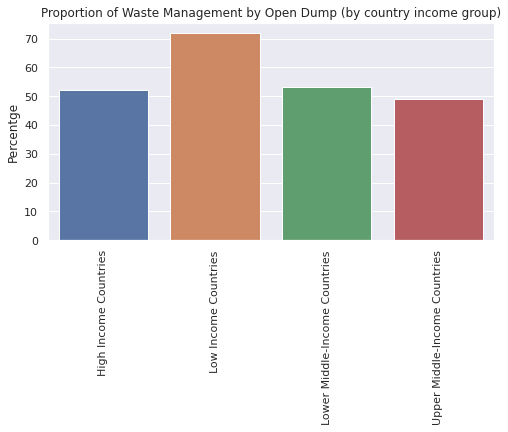

In [483]:
# countries with worst waste management - open dump by income id
opendump = df.groupby(['income_id'])['waste_treatment_open_dump_percent'].mean().round(2).reset_index()
opendump['income_id'].replace({'HIC': 'High Income Countries', 'LIC': 'Low Income Countries', 'LMC': 'Lower Middle-Income Countries', 'UMC': 'Upper Middle-Income Countries'}, inplace=True)
#opendump.sort_values(by='waste_treatment_open_dump_percent', ascending=False)
sns.barplot(x='income_id', y='waste_treatment_open_dump_percent', data=opendump)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Percentge')
plt.title('Proportion of Waste Management by Open Dump (by country income group)')

In [484]:
map = folium.Map(location=[39.38, 8.22], zoom_start=2)
folium.Choropleth(
    #The GeoJSON data to represent the world country
    geo_data=country_shapes,
    name='Locations where Open Dump is still Adopted for Waste Management',
    data=df,
    #The column aceppting list with 2 value; The country name and  the numerical value
    columns=['country_name', 'waste_treatment_open_dump_percent'],
    key_on='feature.properties.name',
    fill_color='RdYlBu_r',
    nan_fill_color='grey'
    ).add_to(map)
map

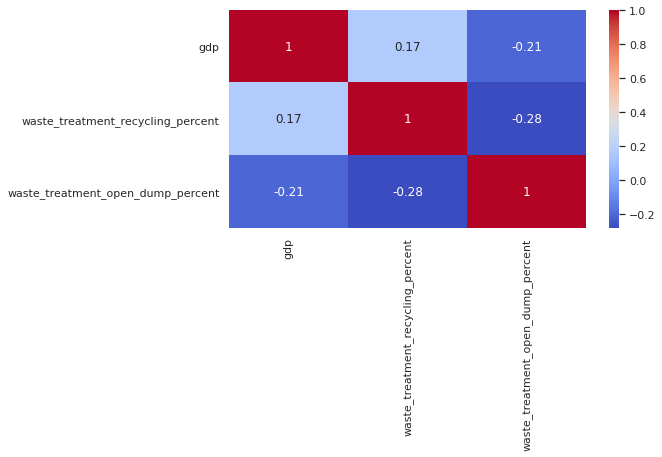

In [485]:
# is waste management methods gdp dependent
corr_map = df[['gdp', 'waste_treatment_recycling_percent', 'waste_treatment_open_dump_percent']]
corr_matrix = corr_map.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')